Excercise-1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\irisdata.csv')

In [11]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='Sepal Length', ylabel='Sepal Width'>

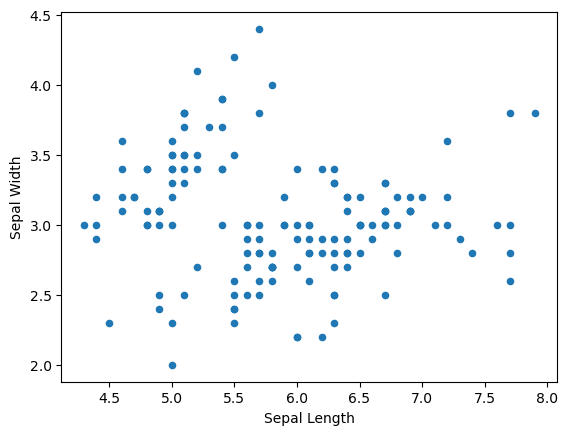

In [15]:
df.plot.scatter(x='Sepal Length',y='Sepal Width')

<Axes: xlabel='Petal Length', ylabel='Petal Width'>

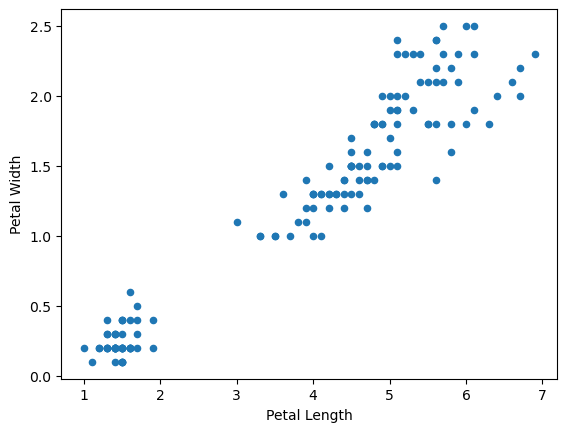

In [17]:
df.plot.scatter(x='Petal Length',y='Petal Width')

array([[<Axes: title={'center': 'Sepal Length'}>,
        <Axes: title={'center': 'Sepal Width'}>],
       [<Axes: title={'center': 'Petal Length'}>,
        <Axes: title={'center': 'Petal Width'}>]], dtype=object)

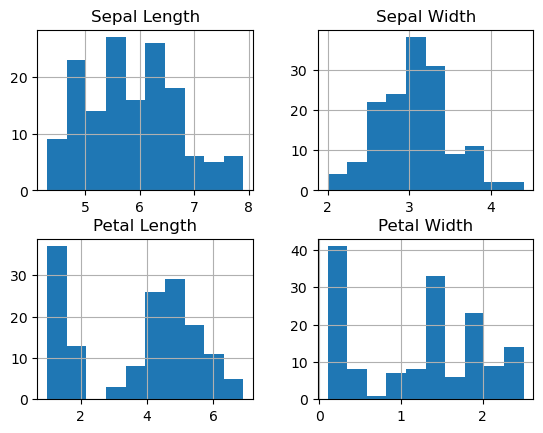

In [19]:
df.hist()

<Axes: >

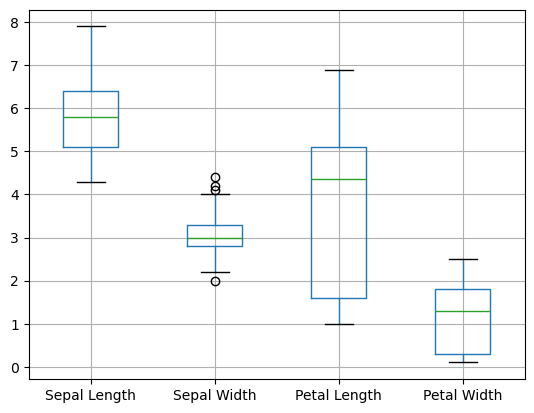

In [21]:
df.boxplot()

In [23]:
df.isnull()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df['Species'] = df['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
print(df)

     Sepal Length  Sepal Width  Petal Length  Petal Width  Species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [33]:
x=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

KNN

In [40]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pre_KNN=model.predict(x_test)
accuracy=accuracy_score(y_test,pre_KNN)
print("KNN Accuracy is:", f"{accuracy*100}")
print("\nClassification Report:")
print(classification_report(y_test, pre_KNN))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pre_KNN))

KNN Accuracy is: 93.33333333333333

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.92      0.92      0.92        12
           3       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]


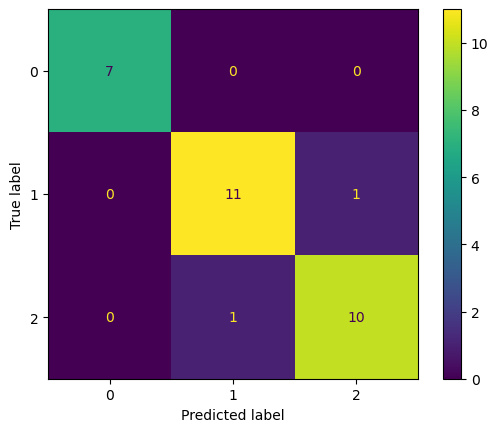

In [113]:
cm=confusion_matrix(y_test, pre_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
pre_LR = model.predict(x_test)
accuracy = accuracy_score(y_test, pre_LR)
print("Logistic Regression Accuracy is:", f"{accuracy*100}")
print("\nClassification Report:")
print(classification_report(y_test, pre_LR))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pre_LR))

Logistic Regression Accuracy is: 90.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.85      0.92      0.88        12
           3       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


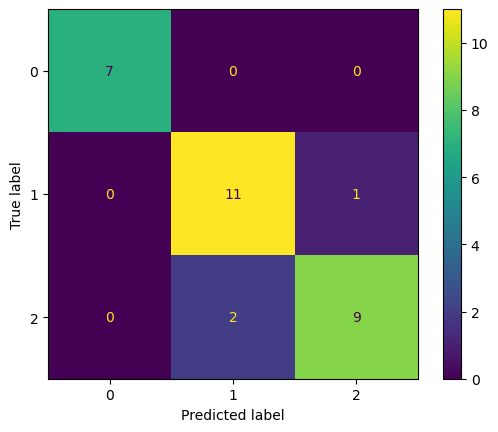

In [115]:
cm=confusion_matrix(y_test, pre_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [121]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_DT= model.predict(x_test)
accuracy = accuracy_score(y_test, prediction_DT)
print("Decision Tree Accuracy is:", f"{accuracy*100}")
print("\nClassification Report:")
print(classification_report(y_test, pred_DT))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_DT))

Decision Tree Accuracy is: 90.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.85      0.92      0.88        12
           3       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


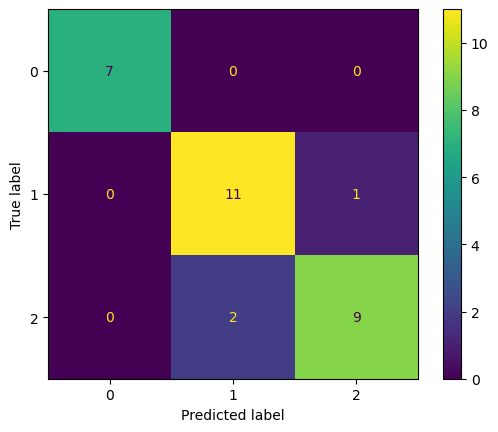

In [123]:
cm=confusion_matrix(y_test, pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


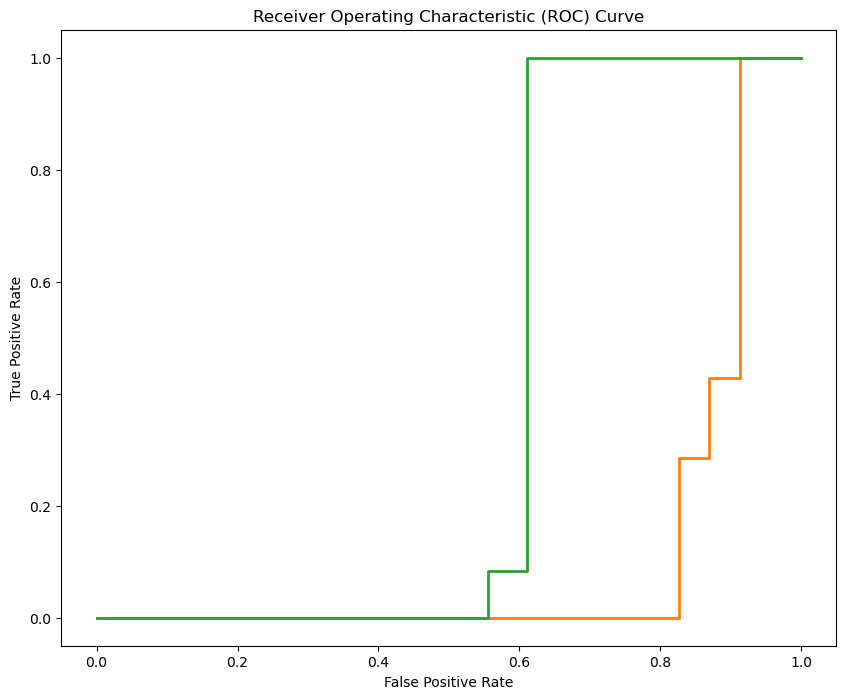

AUC scores for each class:
Class 1: AUC = nan
Class 2: AUC = 0.12
Class 3: AUC = 0.39


In [55]:
clf = LogisticRegression(max_iter=1000)

# Define the hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear']  # Optimization algorithm
}

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)
# Binarize the output labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],  lw=2,label='ROC curve of class {0} ' ''.format(df['Species'].astype('category').cat.categories[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Print AUC scores
print("AUC scores for each class:")
for i in range(n_classes):
    print(f"Class {df['Species'].astype('category').cat.categories[i]}: AUC = {roc_auc[i]:.2f}")

Kfold Cross validation

In [57]:
from sklearn.model_selection import KFold, cross_val_score

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [61]:
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, x, y, cv=kf)
print(f'KNN Mean Accuracy: {knn_scores.mean():.4f}')

KNN Mean Accuracy: 0.9533


In [65]:
log_reg = LogisticRegression()
log_reg_scores = cross_val_score(log_reg, x, y, cv=kf)
print(f'Logistic Regression Mean Accuracy: {log_reg_scores.mean():.4f}')

Logistic Regression Mean Accuracy: 0.9467


In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree, x, y, cv=kf)
print(f'Decision Tree Mean Accuracy: {decision_tree_scores.mean():.4f}')

Decision Tree Mean Accuracy: 0.9467


PCA-2D

In [71]:
from sklearn.decomposition import PCA

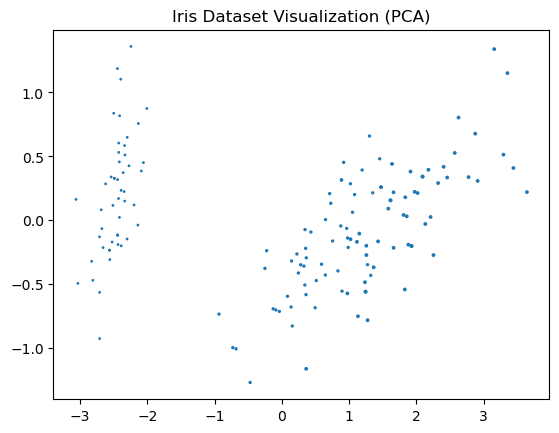

In [79]:
pca= PCA()
principal_components = pca.fit_transform(x)
plt.scatter(principal_components[:, 0], principal_components[:, 1], y)
plt.title("Iris Dataset Visualization (PCA)")
plt.show()

Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
pre_RF = model.predict(x_test)
accuracy_RF = accuracy_score(y_test, pre_RF)
print("Random Forest Accuracy is:" ,f"{accuracy_RF*100}")

Random Forest Accuracy is: 90.0


SVM

In [99]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pre_SVM = model.predict(x_test)
accuracy_SVM = accuracy_score(y_test, pre_SVM)
print("Support Vector Accuracy is:", f"{accuracy_SVM*100}")

Support Vector Accuracy is: 93.33333333333333


In [ ]:
Neural Network

In [101]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
model=model.fit(x_train, y_train)
pre_NN = model.predict(x_test)
accuracy_NN = accuracy_score(y_test, pre_NN)
print("Neural Network Accuracy is:", f"{accuracy_NN*100}")

Neural Network Accuracy is: 93.33333333333333


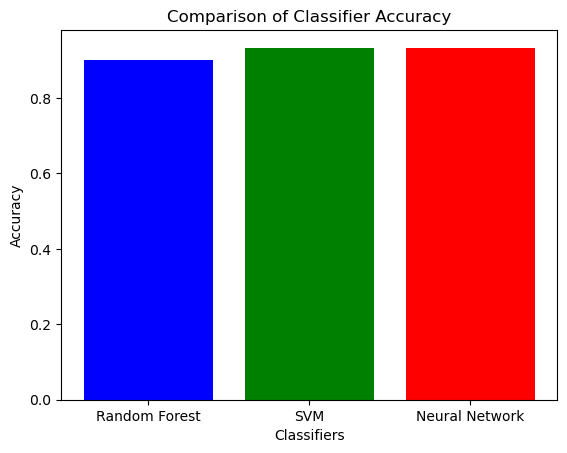

In [107]:
classifiers = ['Random Forest','SVM', 'Neural Network']
accuracies = [accuracy_RF,accuracy_SVM, accuracy_NN]
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.show()